In [128]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import re
import difflib as dl
import nltk

In [129]:
data = pd.read_csv("Mammogram Path Reports.csv")
data.columns = ["Path Report", "Label"]
numPatients = data.shape[0]

path1 = data["Path Report"][0]

In [130]:
letters = "A\. | B\. | C\. | D\. | E\. | F\. | G\. | H\. | I\. | J\. | K\. "

In [131]:
splitReps = []
for pathRep in data["Path Report"]:
    splitRep = re.split(letters, pathRep)
    if len(splitRep) > 1:
        splitRep = splitRep[1:]
    splitReps.append(splitRep)

In [132]:
splitReps

[['Breast, left, simple mastectomy: 1. Invasive lobular carcinoma in a background of lobular carcinoma in situ, negative margins; see comment. 2. Ductal carcinoma in situ, grade 2, negative margins; see comment. 3. Hyalinized fibroadenoma, radial scar and fibrocystic changes. 4. Biopsy site changes. 5. Nipple with no significant pathologic abnormality.',
  'Lymph node, sentinel node #1, biopsy: No tumor in one lymph node (0/1).',
  'Lymph node, sentinel node #2, biopsy: No tumor in one lymph node (0/1).',
  'Lymph node, nonsentinel node #3, biopsy: No tumor in one lymph node (0/1).',
  'Breast, right, simple mastectomy: 1. Sclerosing papilloma; see comment. 2. Radial scar. 3. Fibrocystic changes.'],
 ['Left breast, "mass at 12 o\'clock 3 cm from nipple", needle core biopsy: 1. Invasive ductal carcinoma; see comment. 2. Focal ductal carcinoma in situ, intermediate nuclear grade, solid pattern; see comment.',
  "Right breast, 10 o'clock 4 cm from nipple, needle core biopsy: Dense sclerot

In [133]:
data["Split Path Report"] = splitReps
data

,Path Report,Label,Split Path Report
0,"A. Breast, left, simple mastectomy: 1. Invasiv...",Left Positive,"[Breast, left, simple mastectomy: 1. Invasive ..."
1,"A. Left breast, ""mass at 12 o'clock 3 cm from ...",Left Positive,"[Left breast, ""mass at 12 o'clock 3 cm from ni..."
2,"A. Right axillary contents, excision: No carci...",Negative,"[Right axillary contents, excision: No carcino..."
3,"Right breast, excision of mammographic lesion:...",Right Positive,"[Right breast, excision of mammographic lesion..."
4,"A. Sentinel lymph node #1, left axilla, biopsy...",Left Positive,"[Sentinel lymph node #1, left axilla, biopsy: ..."
5,"A. Left breast, biopsy: 1. Infiltrating ductal...",Left Positive,"[Left breast, biopsy: 1. Infiltrating ductal c..."
6,"Left breast, 9:30, needle core biopsy: Invasiv...",Left Positive,"[Left breast, 9:30, needle core biopsy: Invasi..."
7,"A. Left breast, mastectomy: 1. Ductal carcinom...",Left Positive,"[Left breast, mastectomy: 1. Ductal carcinoma ..."
8,"A. Lymph node, right axillary, sentinel node #...",Right Positive,"[Lymph node, right axillary, sentinel node #1,..."
9,"Breast, left, ""12 o'clock,"" biopsy: Pleomorphi...",Left Positive,"[Breast, left, ""12 o'clock,"" biopsy: Pleomorph..."


In [134]:
biopData = pd.DataFrame(columns = ["Patient", "Biopsy Description", "Path Report", "Laterality"])

In [135]:
patIds = range(data.shape[0])
bioType, pathRep, patients, labels = [], [], [], []

for patId in patIds:
    patient = data.iloc[patId]
    for rep in patient[2]:
        #split report into biopsy description and path report
        splitRep = rep.split(": ")
        
        if len(splitRep) > 1:
            bioType.append(splitRep[0])
            pathRep.append(splitRep[1])
            patients.append(patId)
            labels.append(patient["Label"])
            
biopData["Patient"] = patients
biopData["Biopsy Description"] = bioType
biopData["Path Report"] = pathRep
biopData["Rad Label"] = labels

In [164]:
# Extracting laterality, biopsy source, and labels
lats, organs = [], []
for biop in biopData["Biopsy Description"]:
    biop = nltk.word_tokenize(biop.lower())

    if len(dl.get_close_matches("left", biop)) > 0:
        lats.append("left")
    elif len(dl.get_close_matches("right", biop)) > 0:
        lats.append("right")
    else:
        lats.append("na")

    if len(dl.get_close_matches("breast", biop)) > 0:
        organs.append("breast")
    elif len(dl.get_close_matches("nipple", biop)) > 0:
        organs.append("breast")
    elif len(dl.get_close_matches("lymph", biop)) > 0:
        organs.append("lymph node")
    elif len(dl.get_close_matches("skin", biop)) > 0:
        organs.append("skin")
    elif len([word for wordList in [dl.get_close_matches(br, biop) 
            for br in ["axilla", "uterus", "fallopian", "ovary", "adnexa"]] 
              for word in wordList]) > 0:
        organs.append("uterus")
    else:
        organs.append("na")
biopData["Laterality"] = lats
biopData["Biopsy Source"] = organs

numSamples = biopData.shape[0]

biopData

,Patient,Biopsy Description,Path Report,Laterality,Rad Label,Biopsy Source,Cancer Type
0,0,"Breast, left, simple mastectomy",1. Invasive lobular carcinoma in a background ...,left,Left Positive,breast,invasive lobular carcinoma
1,0,"Lymph node, sentinel node #1, biopsy",No tumor in one lymph node (0/1).,na,Left Positive,lymph node,normal
2,0,"Lymph node, sentinel node #2, biopsy",No tumor in one lymph node (0/1).,na,Left Positive,lymph node,normal
3,0,"Lymph node, nonsentinel node #3, biopsy",No tumor in one lymph node (0/1).,na,Left Positive,lymph node,normal
4,0,"Breast, right, simple mastectomy",1. Sclerosing papilloma; see comment. 2. Radia...,right,Left Positive,breast,normal
5,1,"Left breast, ""mass at 12 o'clock 3 cm from nip...",1. Invasive ductal carcinoma; see comment. 2. ...,left,Left Positive,breast,invasive ductal carcinoma
6,1,"Right breast, 10 o'clock 4 cm from nipple, nee...",Dense sclerotic fibrous tissue with scant beni...,right,Left Positive,breast,normal
7,2,"Right axillary contents, excision",No carcinoma in 10 lymph nodes (0/10).,right,Negative,uterus,normal
8,2,"Skin, right axilla, excision",Intradermal nevus.,right,Negative,skin,normal
9,2,"Right nipple, excision",1. Skin of nipple with underlying lactiferous ...,right,Negative,breast,normal


## Labeling Path Reports 
Labels: Normal, Fibroadenoma, Ductal Carcinoma In Situ, Invasive Ductal Carcinoma, Invasive Carcinoma In Situ

In [290]:
negate_sequence(nltk.word_tokenize("No tumor in one lymph node (0/1)."))

['No',
 'not_tumor',
 'not_in',
 'not_one',
 'not_lymph',
 'not_node',
 'not_(',
 'not_0/1',
 'not_)',
 '.']

In [137]:
# Negation Processing
def negate_sequence(tokens):
    """
    Detects negations and transforms negated words into "not_" form.
    """
    negation = False
    delims = "?.,!:;"
    result = []
#Here rather then applying split, we can directly feed our extracted symptoms list
    #words = text.split()
    prev = None
    pprev = None
    for token in tokens:
        # stripped = word.strip(delchars)
        #stripped = word.strip(delims).lower()
        if any(c == token for c in delims):
            negation = False
        
        negated = "not_" + token if negation else token
        result.append(negated)

        if any(neg == token.lower() for neg in ["not", "n't", "no"]):
            negation = not negation   

    return result

In [272]:
#biopData["Path Report Negated"] = biopData["Path Report"].apply(
#    lambda s: ' '.join(negate_sequence(nltk.word_tokenize(s))))
cancer_types = ["invasive lobular carcinoma", "invasive carcinoma in situ", 
                "invasive ductal carcinoma", "ductal carcinoma in situ", "carcinoma", 
                "adenocarcinoma", "fibroadenoma"]

cancer_re = ["(invasive)? \s lobular \s carcinoma (\s in \s situ)?", 
             "invasive \s carcinoma \s in [ -] situ", 
             "(invasive | infiltrating) \s duct(al)? \s carcinoma", 
             "duct(al)? \s carcinoma (\s in [ -] situ)?", 
             "(invasive | infiltrating | differen[\w]*) \s carcinoma (\s with \s ductal \s and \s lobular \s features)?",
             "adenocarcinoma", 
             "fibroadenoma"]

cancer_re = [re.compile(reg, re.VERBOSE) for reg in cancer_re]

In [273]:
biopData["Path Report"][0]

'1. Invasive lobular carcinoma in a background of lobular carcinoma in situ, negative margins; see comment. 2. Ductal carcinoma in situ, grade 2, negative margins; see comment. 3. Hyalinized fibroadenoma, radial scar and fibrocystic changes. 4. Biopsy site changes. 5. Nipple with no significant pathologic abnormality.'

In [274]:
re.search(cancer_re[3], 'Infiltrating ductal carcinoma, Grade I, extending to the inked surgical margin. See comment.'
)#.group(0) #biopData["Path Report"][0].lower()

<_sre.SRE_Match object; span=(13, 29), match='ductal carcinoma'>

In [275]:

def fuzzySubstrMatch(string, query, cutoff=0.7):
    s = dl.SequenceMatcher(None, string, query)
    matchRatio = sum(n for i,j,n in s.get_matching_blocks()) / float(len(query))
    return matchRatio > cutoff

def getCancerType(rep):
    rep = ' '.join(negate_sequence(nltk.word_tokenize(rep))).lower()
    
    for i in range(len(cancer_types)): #cancer in cancer_types:
        if re.search(cancer_re[i], rep): #cancer in rep: #fuzzySubstrMatch(rep, cancer, 0.95):
            return cancer_types[i]
    return "normal"

In [276]:
fuzzySubstrMatch("Fibroadipose tissue , no not_tumor .", 
                 "fibroadenoma", 0.9)

False

In [277]:
9/12

0.75

In [278]:
biopData["Cancer Type"] = biopData["Path Report"].apply(getCancerType)

In [279]:
bad_cancers = cancer_types[:-1]
def radLabel(patID):
    biops = biopData[biopData["Patient"] == patID]
    leftPos, rightPos = False, False
    for (i, biop) in biops.iterrows():
        if biop["Laterality"] == "left" and biop["Cancer Type"] in bad_cancers:
            leftPos = True
        if biop["Laterality"] == "right" and biop["Cancer Type"] in bad_cancers:
            rightPos = True  
    
    if leftPos and rightPos:
        return "Bilateral Positive"
    elif leftPos:
        return "Left Positive"
    elif rightPos:
        return "Right Positive"
    else:
        return "Negative"

In [280]:
labels = []
for patID in range(numPatients):
    labels.append(radLabel(patID))
data["Extracted Label"] = labels

In [282]:
def precision(data):
    """Proportion of samples that we identified as positive that were actually positive tP/total positive
        Param: - results is a list of labels returned by the classifier
              - reference is a list of correct labels of test set"""
    TP = sum([(results[i] == "Positive") and (reference[i] == "Positive") for i in range(len(reference))])
    FP = sum([(results[i] == "Positive") and (reference[i] == "Negative") for i in range(len(reference))])
    return TP / (TP + FP)

def recall(data):
    """Proportion of positive samples that we caught tP/total actual positive
        Param: - results is a list of labels returned by the classifier
              - reference is a list of correct labels of test set"""
    TP = sum([(results[i] == "Positive") and (reference[i] == "Positive") for i in range(len(reference))])
    FN = sum([(results[i] == "Negative") and (reference[i] == "Positive") for i in range(len(reference))])
    return TP / (TP + FN)

In [281]:
accuracy = sum(data["Label"] == data["Extracted Label"]) / numPatients
accuracy

0.9668658337859859

In [260]:
misPatIDs = data[data["Label"] != data["Extracted Label"]].index.values
#biopData[biopData["Patient"] == misPatIDs].iloc[0]["Path Report"]
misSamples = biopData.iloc[[row for row in range(numSamples) if biopData.iloc[row]["Patient"] in misPatIDs]]
misSamples#["Path Report"].values#[["Patient", "Path Report", "Cancer Type"]]
#biopData["Path Report"][5]
#re.search(cancer_re, biopData["Path Report"][5])

,Patient,Biopsy Description,Path Report,Laterality,Rad Label,Biopsy Source,Cancer Type
50,23,"Right breast, total skin-sparing mastectomy",1. Metaplastic carcinoma with chondroid differ...,right,Right Positive,breast,normal
51,23,"Sentinel lymph node #1, biopsy","Adipose and fibrovascular tissue, no lymph nod...",na,Right Positive,lymph node,normal
56,28,"Breast, needle-localization excision biopsy","Infiltrating ductal carcinoma, Grade I, extend...",na,Right Positive,breast,invasive ductal carcinoma
57,28,"Thigh, right, excision of mass",Lipoma.,right,Right Positive,na,normal
63,31,"Left breast, 3 o'clock, needle core biopsy",Undifferentiated carcinoma with lobular and du...,left,Left Positive,breast,normal
96,45,"Left Breast, Ultrasound Guided Fine Needle Asp...",Recurrent/recidual Papillary carcinoma in situ...,left,Left Positive,breast,normal
265,157,"Breast, left, needle core biopsy",Invasive carcinoma with mixed ductal and lobul...,left,Left Positive,breast,normal
541,343,"Right breast, outer quadrant, lumpectomy","1. LCIS, pleomorphic type, 0.9 cm in maximum d...",right,Right Positive,breast,normal
553,348,"Left nipple, re-excision",Benign breast tissue with surgical site change...,left,Left Positive,breast,normal
554,348,"Left axillary contents, dissection",Metastatic carcinoma in one of eleven lymph no...,left,Left Positive,uterus,normal


In [261]:
data.iloc[3455]["Path Report"]
#re.search(cancer_re[4], "invasive carcinoma with mucinous features")#data.iloc[410]["Path Report"].lower())
#cancer_re[4] #Invasive carcinoma with ductal and lobular features

'A. "Right breast lesion," surgical biopsy: Poorly differentiated carcinoma, 0.9 cm greatest dimension, present at margins; see comment. B. Right breast capsule, capsulectomy: Consistent with capsule; no carcinoma identified. C. Left breast capsule, capsulectomy: Consistent with capsule; no carcinoma identified.'

## Naive Bayes Classifier

In [81]:
biopData


def getCancerLabel(biop):
    #patID = biop["Patient"]
    #label = data.iloc[patID]["Label"]
    label = biop["Patient Label"]
    laterality = biop["Laterality"]
    
    # To see possible labels run data.groupby("Label").count()
    
    if label == "Negative":
        return "Negative"
    if laterality == "left":
        if label == "Bilateral Positive" or label == "Left Positive":
            return "Positive"
        return "Negative"
    elif laterality == "right":
        if label == "Bilateral Positive" or label == "Right Positive":
            return "Positive"
        return "Negative"
    else:
        return None

biopData["Biopsy Label"] = [getCancerLabel(biopData.iloc[i]) for i in range(numSamples)]

In [80]:
None

In [138]:
biopData[biopData["Patient"] == 7]

,Patient,Biopsy Description,Path Report,Laterality,Patient Label,Biopsy Source,Biopsy Label,Path Report Tokenized,Path Report BoW
22,7,"Left breast, mastectomy","1. Ductal carcinoma in situ, intermediate and ...",left,Left Positive,breast,Positive,"[1, ., Ductal, carcinoma, in, situ, ,, interme...","{'Port': 0, 'therapy-related': 0, 'Single': 0,..."
23,7,"Medial superior margin left breast, excision","Mature adipose tissue, no breast epithelial un...",left,Left Positive,breast,Positive,"[Mature, adipose, tissue, ,, no, breast_NEG, e...","{'Port': 0, 'therapy-related': 0, 'Single': 0,..."


In [56]:
nltk.word_tokenize("This will be a complex sentence; compound f.t.w.")

['This',
 'will',
 'be',
 'a',
 'complex',
 'sentence',
 ';',
 'compound',
 'f.t.w',
 '.']

In [57]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [132]:
# Negating 
def negate_sequence(tokens):
    """
    Detects negations and transforms negated words into "not_" form.
    """
    negation = False
    delims = "?.,!:;"
    result = []
#Here rather then applying split, we can directly feed our extracted symptoms list
    #words = text.split()
    prev = None
    pprev = None
    for token in tokens:
        # stripped = word.strip(delchars)
        #stripped = word.strip(delims).lower()
        if any(c == token for c in delims):
            negation = False
        
        negated = "not_" + token if negation else token
        result.append(negated)

        if any(neg == token.lower() for neg in ["not", "n't", "no"]):
            negation = not negation   

    return result

In [141]:
biopData["Path Report Tokenized"] = biopData["Path Report"].apply(lambda s: negate_sequence(nltk.word_tokenize(s)))
# Can try double negation flip, set parameter double_neg_flip = True

In [142]:
# Constructing feature representation of Path Reports. The feature set is a dictionary where
# the keys are words, and the values are frequencies

compiledReps = []
for i in range(numSamples):
    compiledReps += biopData.iloc[i]["Path Report Tokenized"]

vocab = set(compiledReps)

def getPRBoW(pathRep):
    bow = {}
    for word in vocab:
        bow[word] = pathRep.count(word)
    return bow

biopData["Path Report BoW"] = biopData["Path Report Tokenized"].apply(getPRBoW)

In [143]:
breastData = biopData[biopData["Biopsy Source"] == "breast"].dropna()
num_brsamples = breastData.shape[0]

brfeatureset = [(breastData.iloc[i]["Path Report BoW"], breastData.iloc[i]["Biopsy Label"]) 
            for i in range(num_brsamples)]

In [144]:
breastData.reset_index()#.iloc[10]["Path Report"]

,index,Patient,Biopsy Description,Path Report,Laterality,Patient Label,Biopsy Source,Biopsy Label,Path Report Tokenized,Path Report BoW
0,0,0,"Breast, left, simple mastectomy",1. Invasive lobular carcinoma in a background ...,left,Left Positive,breast,Positive,"[1, ., Invasive, lobular, carcinoma, in, a, ba...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
1,4,0,"Breast, right, simple mastectomy",1. Sclerosing papilloma; see comment. 2. Radia...,right,Left Positive,breast,Negative,"[1, ., Sclerosing, papilloma, ;, see, comment,...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
2,5,1,"Left breast, ""mass at 12 o'clock 3 cm from nip...",1. Invasive ductal carcinoma; see comment. 2. ...,left,Left Positive,breast,Positive,"[1, ., Invasive, ductal, carcinoma, ;, see, co...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
3,6,1,"Right breast, 10 o'clock 4 cm from nipple, nee...",Dense sclerotic fibrous tissue with scant beni...,right,Left Positive,breast,Negative,"[Dense, sclerotic, fibrous, tissue, with, scan...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
4,9,2,"Right nipple, excision",1. Skin of nipple with underlying lactiferous ...,right,Negative,breast,Negative,"[1, ., Skin, of, nipple, with, underlying, lac...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
5,10,3,"Right breast, excision of mammographic lesion","1. Ductal carcinoma in situ (DCIS), intermedia...",right,Right Positive,breast,Positive,"[1, ., Ductal, carcinoma, in, situ, (, DCIS, )...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
6,14,4,"Right breast, skin-sparing total mastectomy",1. No in situ or invasive carcinoma. 2. Lobula...,right,Left Positive,breast,Negative,"[1, ., No, not_in, not_situ, not_or, not_invas...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
7,15,4,"Right breast, nipple tissue, biopsy","Breast tissue, no tumor.",right,Left Positive,breast,Negative,"[Breast, tissue, ,, no, not_tumor, .]","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
8,16,4,"Left breast, skin-sparing total mastectomy","1. Residual invasive ductal carcinoma, 0.5 cm;...",left,Left Positive,breast,Positive,"[1, ., Residual, invasive, ductal, carcinoma, ...","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."
9,17,4,"Left breast, re-excision","Fibroadipose tissue, no tumor.",left,Left Positive,breast,Positive,"[Fibroadipose, tissue, ,, no, not_tumor, .]","{'Port': 0, 'Single': 0, 'not_0/20': 0, '2.1':..."


In [185]:
s = breastData.reset_index().iloc[5]["Path Report"]
s

'1. Ductal carcinoma in situ (DCIS), intermediate grade, with focal comedonecrosis, present in multiple microscopic foci (largest single focus 0.5 cm) involving overall area of approximately 4.0 cm; tumor is present focally at the superior medial resection margin, and within 0.1 cm of the posterior, medial anterior, and lateral anterior resection margins. 2. Microcalcifications are present focally, both in association with DCIS and in benign breast tissue. 3. No invasive carcinoma is identified. 4. Non-neoplastic breast tissue shows proliferative fibrocystic changes.'

In [146]:
"Hello".lower()

'hello'

In [147]:
negate_sequence(nltk.word_tokenize(breastData.reset_index().iloc[14]["Path Report"]))

['Mature',
 'adipose',
 'tissue',
 ',',
 'no',
 'not_breast',
 'not_epithelial',
 'not_units',
 'not_present',
 ',',
 'no',
 'not_carcinoma',
 'not_or',
 'not_in',
 'not_situ',
 'not_lesion',
 'not_present',
 '.']

## Regex Matching/Preprocessing

In [148]:
numPos = sum(biopData["Biopsy Label"] == "Positive")
numNeg = sum(biopData["Biopsy Label"] == "Negative")
numPosBr = sum(breastData["Biopsy Label"] == "Positive")
numNegBr = sum(breastData["Biopsy Label"] == "Negative")
(numPos, numNeg, numPosBr, numNegBr)

(3019, 3838, 2164, 3454)

In [149]:
# Simply just classify path reps with 
biopData[["carcinoma" in rep for rep in biopData["Path Report"]]]["Patient"]#.tolist().count("Positive")

0          0
5          1
7          2
10         3
14         4
16         4
19         5
20         5
21         6
22         7
23         7
25         8
29         9
30        10
31        10
32        11
33        12
34        12
39        14
42        16
44        18
45        19
46        20
47        21
48        22
49        22
50        23
52        24
53        25
54        26
        ... 
6988    3656
6989    3657
6990    3658
6991    3659
6992    3660
6993    3661
6994    3662
6995    3663
6996    3664
6997    3665
6998    3666
6999    3667
7000    3668
7001    3669
7002    3670
7003    3671
7004    3672
7005    3673
7006    3674
7007    3674
7008    3675
7009    3675
7010    3676
7011    3677
7012    3677
7013    3678
7014    3679
7016    3680
7017    3681
7018    3681
Name: Patient, Length: 2669, dtype: int64

## Naive Bayes Classifier

In [150]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(brfeatureset, test_size=0.2)

In [151]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [152]:
testSet = classifier.classify_many([rep[0] for rep in test])

In [153]:
referenceSet = [rep[1] for rep in test]

In [154]:
(testSet.count("Positive"), referenceSet.count("Positive"))

(287, 421)

In [155]:
print(nltk.classify.accuracy(classifier, test))

0.8185053380782918


In [156]:
classifier.show_most_informative_features(30)

Most Informative Features
                Invasive = 1              Positi : Negati =    424.4 : 1.0
            intermediate = 1              Positi : Negati =    306.7 : 1.0
                    situ = 2              Positi : Negati =    177.2 : 1.0
                   grade = 1              Positi : Negati =    172.7 : 1.0
               carcinoma = 2              Positi : Negati =    148.9 : 1.0
                    situ = 1              Positi : Negati =    139.8 : 1.0
                       2 = 2              Positi : Negati =    139.3 : 1.0
                     low = 1              Positi : Negati =     93.1 : 1.0
                 nuclear = 1              Positi : Negati =     80.8 : 1.0
               carcinoma = 1              Positi : Negati =     72.1 : 1.0
                  Ductal = 1              Positi : Negati =     65.8 : 1.0
                       , = 6              Positi : Negati =     60.4 : 1.0
                       1 = 2              Positi : Negati =     57.1 : 1.0

In [157]:
def precision(results, reference):
    """Proportion of samples that we identified as positive that were actually positive tP/total positive
        Param: - results is a list of labels returned by the classifier
              - reference is a list of correct labels of test set"""
    TP = sum([(results[i] == "Positive") and (reference[i] == "Positive") for i in range(len(reference))])
    FP = sum([(results[i] == "Positive") and (reference[i] == "Negative") for i in range(len(reference))])
    return TP / (TP + FP)

def recall(results, reference):
    """Proportion of positive samples that we caught tP/total actual positive
        Param: - results is a list of labels returned by the classifier
              - reference is a list of correct labels of test set"""
    TP = sum([(results[i] == "Positive") and (reference[i] == "Positive") for i in range(len(reference))])
    FN = sum([(results[i] == "Negative") and (reference[i] == "Positive") for i in range(len(reference))])
    return TP / (TP + FN)

In [158]:
(precision(testSet, referenceSet), recall(testSet, referenceSet))

(0.8780487804878049, 0.5985748218527316)

In [ ]:
num_brsamples = breastData.shape[0]
num_brsamples

In [177]:
def cross_validate(reps):
    precs, recs = [], []
    for _ in range(reps):
        train, test = train_test_split(brfeatureset, test_size=0.2)
        classifier = nltk.NaiveBayesClassifier.train(train)
        results = classifier.classify_many([rep[0] for rep in test])
        reference = [rep[1] for rep in test]
        precs.append(precision(results, reference))
        recs.append(recall(results, reference))
    plt.plot(range(1, reps + 1), precs)
    plt.plot(range(1, reps + 1), recs)
    plt.legend(['precision', 'recall'])
    plt.show()

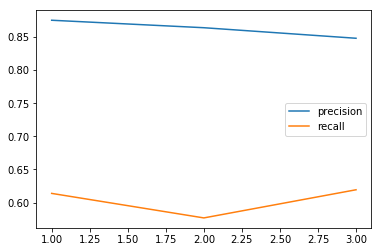

In [178]:
cross_validate(3)

In [286]:
np.random.choice([1, 2, 3], 5, replacement = False)

TypeError: choice() got an unexpected keyword argument 'replacement'

In [288]:
[1, 2, 3].index(3)

2